In [66]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [67]:
data = pd.read_csv('diamonds.csv')

In [68]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()
#cut, color and clarity seem like categorical attributes

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [69]:
data.info()
#from observation we can see that there are no empty attributes
#hence we won't have to worry about the working strategies to tackle them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [70]:
data["cut"].value_counts()
#cut indeed is categorical

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [71]:
data["color"].value_counts()
#color is also categorical

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [72]:
data["clarity"].value_counts()
#clarity is also categorical

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [73]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [74]:
cond = data["z"]!=0.0
data = data[cond]

In [77]:
data["size"] = (data['x'])*(data['y'])*(data['z'])
data["depth_by_z"] = data['depth']/data['z']
data["table_times_y"] = data["table"]*data['y']
corr = data.corr()
print(corr["price"])
#there is definitely a high correlation between the price of the diamond and the carat 
#attribute and the size of the diamond
#depth_by_z also showing very promissing correlation 
#another interesting and very strong correlation is shown by table_times_y 
data.info()

carat            0.921592
depth           -0.010729
table            0.127245
price            1.000000
x                0.887231
y                0.867864
z                0.868206
size             0.904255
table_times_y    0.847582
depth_by_z      -0.819081
Name: price, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 13 columns):
carat            53920 non-null float64
cut              53920 non-null object
color            53920 non-null object
clarity          53920 non-null object
depth            53920 non-null float64
table            53920 non-null float64
price            53920 non-null int64
x                53920 non-null float64
y                53920 non-null float64
z                53920 non-null float64
size             53920 non-null float64
table_times_y    53920 non-null float64
depth_by_z       53920 non-null float64
dtypes: float64(9), int64(1), object(3)
memory usage: 5.8+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000213A48EA978>,
      dtype=object)

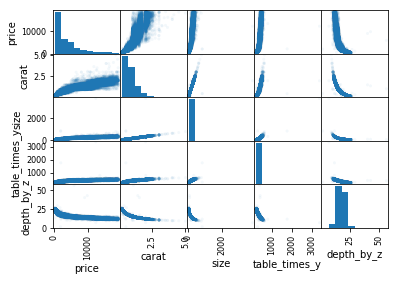

In [78]:
from pandas.plotting import scatter_matrix

scatter_matrix(data[['price','carat','size', 'table_times_y','depth_by_z']], alpha=0.05)

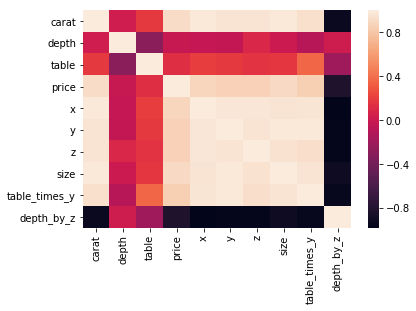

In [79]:
import seaborn as sns

sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values) 

In [80]:
map_categorical = {
                    "cut" : {'Fair': -2, 'Good': -1, 'Very Good':0, 'Premium':1, 'Ideal':2},
                    "clarity" : {'I1': -3, 'SI2': -2, 'SI1':-1, 'VS2':0, 'VS1':1, 'VVS2':2, 'VVS1':3, 'IF':4},
                    "color": {'D':3,'E':2,'F':1,'G':0,'H':-1,'I':-2,'J':-3}
                  }

data.replace(map_categorical, inplace=True) 

In [81]:
data = data.sample(frac=1)
X = data.drop(["price"], axis = 1)
y = data["price"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 42)

In [82]:
X_train.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,size,table_times_y,depth_by_z
20650,1.27,0,0,2,62.5,57.0,6.86,6.91,4.30,203.831180,393.87,14.534884
45759,0.96,-2,-1,-3,66.9,60.0,6.15,6.04,4.09,151.927140,362.40,16.356968
19050,1.59,0,-2,-2,61.6,57.0,7.51,7.56,4.64,263.438784,430.92,13.275862


In [83]:
y_train.head(3)

20650    8941
45759    1705
19050    7835
Name: price, dtype: int64

In [84]:
X_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'size', 'table_times_y', 'depth_by_z'],
      dtype='object')

In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37744 entries, 20650 to 49766
Data columns (total 12 columns):
carat            37744 non-null float64
cut              37744 non-null int64
color            37744 non-null int64
clarity          37744 non-null int64
depth            37744 non-null float64
table            37744 non-null float64
x                37744 non-null float64
y                37744 non-null float64
z                37744 non-null float64
size             37744 non-null float64
table_times_y    37744 non-null float64
depth_by_z       37744 non-null float64
dtypes: float64(9), int64(3)
memory usage: 3.7 MB


# Transformation Pipelines

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin

class DFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    



#class map_cut():
#    def __init__(self, cut):
#        self.cut = cut
#    def fit(self, X, y=None):
#        return self
#    def transform(self,X):
#        X[self.cut] = X[self.cut].map({'Fair': -2, 'Good': -1, 'Very Good':0, 'Premium':1, 'Ideal':2})
#        return X[self.cut]
    
#class map_clarity():
#    def __init__(self,clarity):
#        self.clarity = clarity
#    def fit(self, X, y=None):
#        return self
#    def transform(self,X):
#        X[self.clarity] = X[self.clarity].map({'I1': -3, 'SI2': -2, 'SI1':-1, 'VS2':0, 'VS1':1, 'VVS2':2, 'VVS1':3, 'IF':4})
#        return X[self.clarity]
    
#class map_color():
#    def __init__(self,color):
#        self.color = color
#    def fit(self, X, y=None):
#        return self

#    def transform(self,X):
#        X[self.color] = X[self.color].map({'D':3,'E':2,'F':1,'G':0,'H':-1,'I':-2,'J':-3})
#        return X[self.color] 

In [87]:
num_attributes = list(X_train)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer 

num_pipeline = Pipeline([
    ('selector', DFSelector(num_attributes)),
    ('scaler', StandardScaler())
])

#cut_pipeline = Pipeline([
#    ('selector', DFSelector(['cut'])),
#    ('map_cut', DictVectorizer(sparse=False).fit([cut_map]))
#])

#clarity_pipeline = Pipeline([
#    ('selector',DFSelector(['clarity'])),
#    ('map_clarity', DictVectorizer(sparse = False).fit([clarity_map])),
#])

#color_pipeline = Pipeline([
#    ('selector', DFSelector(['color'])),
#    ('map_color', DictVectorizer(sparse = False).fit([color_map])),
#]) 

In [53]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    #("cut_pipeline", cut_pipeline)
    #("clarity_pipeline", clarity_pipeline),
    #("color_pipeline", color_pipeline)
])


In [88]:
X_train_prepared = num_pipeline.fit_transform(X_train,y_train)
X_train_prepared

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


array([[ 0.99827206, -0.81217075, -0.23591154, ...,  0.97001173,
         0.94531242, -1.0318048 ],
       [ 0.34329904, -2.60431179, -0.82291433, ...,  0.29029514,
         0.48026321, -0.50548513],
       [ 1.67437324, -0.81217075, -1.40991711, ...,  1.75061141,
         1.49282031, -1.39548051],
       ...,
       [ 0.2587864 ,  0.08389978, -0.82291433, ...,  0.248775  ,
         0.58666151, -0.57277039],
       [-1.03003147,  0.9799703 , -0.23591154, ..., -1.02311249,
        -1.37993362,  1.38887769],
       [-0.6285964 ,  0.08389978,  0.35109124, ..., -0.64898376,
        -0.65509524,  0.51037705]])

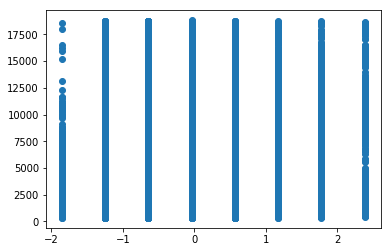

In [89]:
sample = X_train_prepared[0]
sample
plt.scatter(x=X_train_prepared[:,3], y=y_train)

# Helper Functions 

In [90]:
def percent_data_with_given_accuracy(diff, val):
    percent_arr = (abs(diff["Predicted"]-diff["Actual"])/diff["Actual"])*100
    per = 0
    for x in percent_arr:
        if(x<=val):
            per = per+1
    return (per/len(percent_arr))*100

In [91]:
def draw_predictions_actual(test_arr, pred_arr):
    t = np.linspace(0,18500,1000)
    leng = len(pred_arr)
    plt.plot(t,t,c='red')
    plt.scatter(test_arr, pred_arr, alpha=0.05, c='blue')
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.show()
    

# Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_prepared, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_lr, X_train_prepared, y_train, cv=10)
print(scores)

print(scores.mean()*100)

[0.90936882 0.91683153 0.9159211  0.91291098 0.90654898 0.91532904
 0.8935783  0.9181931  0.91337584 0.9092441 ]
91.11301804956138


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


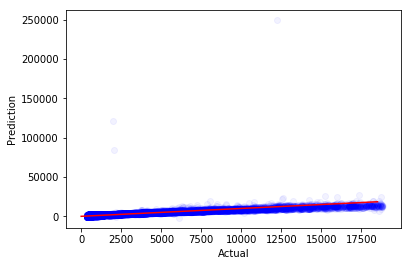

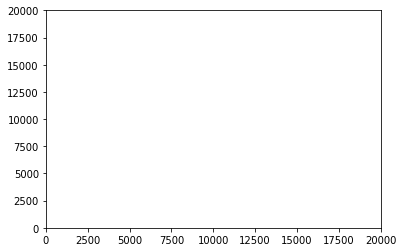

In [100]:
X_test_prepared = num_pipeline.fit_transform(X_test)
pred_lr = model_lr.predict(X_test_prepared)

draw_predictions_actual(y_test.values, pred_lr)
plt.show()

# Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor()
reg_tree.fit(X_train_prepared, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

predictions = reg_tree.predict(X_train_prepared)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9.064213484903108

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg_tree, X_train_prepared, y_train, scoring = "neg_mean_squared_error", cv=10)

In [22]:
np.sqrt(-scores).mean()

750.1625136424657

In [23]:
np.sqrt(-scores).std()

16.295899668921496

In [24]:
data["price"].mean()

3932.799721913237

In [34]:
X_test_prepared = full_pipeline.fit_transform(X_test,y_test)
pred_tree = reg_tree.predict(X_test_prepared) 

In [36]:
diff = pd.DataFrame(data = pred_tree)
diff.columns = ['Predicted']
diff["Actual"] = y_test.values

In [37]:
diff.head(5) 

,Predicted
0,17713.0
1,5055.0
2,720.0
3,4189.0
4,11255.0


In [57]:
percent_data_with_given_accuracy(diff,20)
#the predicted and actual values differ by apprx 9.42%
#this looks pretty bad, only 43% of the predictions had an error of less than 5%
#we will try some other regressor to tackle this issue

80.18786305771846

In [40]:
pred_tree

array([17713.,  5055.,   720., ...,  3162.,  5420.,  1862.])

In [31]:
y_test.values

array([16304,  6303,   743, ...,  3435,  6037,  2576], dtype=int64)

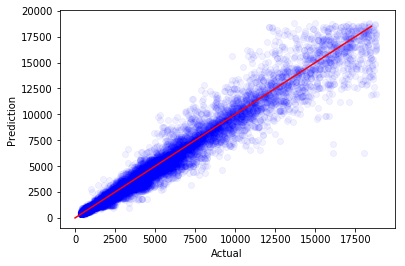

In [41]:
draw_predictions_actual(y_test.values, pred_tree)
plt.show()

# SVM Regressor

In [42]:
#now we will try the SVC Regressor
from sklearn import svm

clf = svm.SVR(kernel='linear')
clf.fit(X_train_prepared, y_train.values)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
clf.score(X_test_prepared, y_test.values)
#svm gave accuracy of ~85% on test dataset

0.8408660754491666

In [44]:
pred_svm = clf.predict(X_test_prepared) 

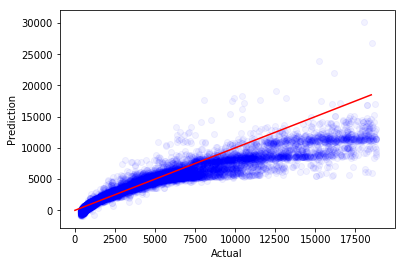

In [45]:
draw_predictions_actual(y_test.values, pred_svm)
plt.show()

In [47]:
diff_svm = pd.DataFrame(data = pred_svm)
diff_svm.columns = ['Predicted']

diff_svm["Actual"] = y_test.values
percent_diff_svm = ((abs(diff_svm["Predicted"]-diff_svm["Actual"])/diff_svm["Actual"])*100).mean()
percent_arr = (abs(diff_svm["Predicted"]-diff_svm["Actual"])/diff_svm["Actual"])*100

per_5 = 0
for x in percent_arr:
    if(x<=5):
        per_5 = per_5+1
        
print('percent predictions with less than 5% deviation from actual value= ',(per_5/len(percent_arr))*100)

per_10 = 0
for x in percent_arr:
    if(x<=10):
        per_10 = per_10+1
        
print('percent predictions with less than 10% deviation from actual value= ',(per_10/len(percent_arr))*100)


print('percent error on average= ',percent_diff_svm)

percent predictions with less than 5% deviation from actual value=  17.28463725126684
percent predictions with less than 10% deviation from actual value=  32.795698924731184
percent error on average=  24.537247848821544


In [48]:
scores = cross_val_score(clf, X_train_prepared, y_train, scoring = "neg_mean_squared_error", cv=10)
print(np.sqrt(-scores).mean())
np.sqrt(-scores).std()

1510.1995147035686


44.17761599696236

# Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

regr_linear = LinearRegression()
regr_linear.fit(X_train_prepared, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
regr_linear.score(X_train_prepared,y_train)
#the score is more promising than SVM

0.9212302211240244

In [51]:
pred_lr = regr_linear.predict(X_test_prepared) 

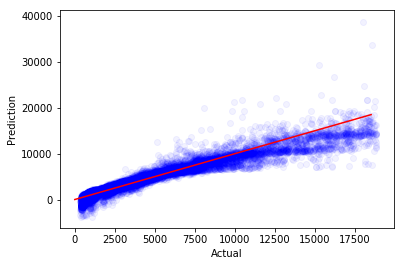

In [52]:
draw_predictions_actual(y_test.values, pred_lr)
plt.show() 

In [ ]:
diff_lr = pd.DataFrame(data = pred_lr)
diff_lr.columns = ['Predicted']

diff_lr["Actual"] = y_test.values
percent_diff_lr = ((abs(diff_lr["Predicted"]-diff_lr["Actual"])/diff_lr["Actual"])*100).mean()
percent_arr = (abs(diff_lr["Predicted"]-diff_lr["Actual"])/diff_lr["Actual"])*100

per_5 = 0
for x in percent_arr:
    if(x<=5):
        per_5 = per_5+1
        
print('percent predictions with less than 5% deviation from actual value= ',(per_5/len(percent_arr))*100)

per_10 = 0
for x in percent_arr:
    if(x<=10):
        per_10 = per_10+1
        
print('percent predictions with less than 10% deviation from actual value= ',(per_10/len(percent_arr))*100)


print('percent error on average= ',percent_diff_lr)

In [ ]:
diff

In [ ]:
scores = cross_val_score(regr_linear, X_train_prepared, y_train, scoring = "neg_mean_squared_error", cv=10)
print(np.sqrt(-scores).mean())
np.sqrt(-scores).std()

In [122]:
#polynomial regressor
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train_prepared)
X_train_prepared[0].shape


(26,)

In [124]:
X_poly_train[0].shape

(377,)